In this project, we will use XGBoost Regressor to predict the house prices in Boston.

XGBoostRegressor is an esemble model that is combination of more than 1 models. Its a decision-tree model.

For this project, we are importing the dataset from SkLearn library. The data contains prices for california housings.

Importing the dependencies

In [48]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import sklearn.datasets

Importing Boston House Prices Dataset

In [8]:
house_prices_dataset = sklearn.datasets.fetch_california_housing()
print(house_prices_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [13]:
house_prices_dataframe = pd.DataFrame(house_prices_dataset.data, columns= house_prices_dataset.feature_names)
# column -> it species to include the features name in the header of the dataframe
print(house_prices_dataframe.head())

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]


In [16]:
house_prices_dataframe['prices'] = house_prices_dataset.target
# since previously we only added the features to the dataframe
# now we add the target(prices) to the dataframe.
print(house_prices_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  prices
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]


In [17]:
# checking the shape of the dataframe
print(house_prices_dataframe.shape)

(20640, 9)


In [19]:
# checking any null features
print(house_prices_dataframe.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
prices        0
dtype: int64


In [21]:
print(house_prices_dataframe.describe())

             MedInc      HouseAge  ...     Longitude        prices
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]


In [29]:
# understanding the data 
correlation = house_prices_dataframe.corr()
print(correlation)

              MedInc  HouseAge  AveRooms  ...  Latitude  Longitude    prices
MedInc      1.000000 -0.119034  0.326895  ... -0.079809  -0.015176  0.688075
HouseAge   -0.119034  1.000000 -0.153277  ...  0.011173  -0.108197  0.105623
AveRooms    0.326895 -0.153277  1.000000  ...  0.106389  -0.027540  0.151948
AveBedrms  -0.062040 -0.077747  0.847621  ...  0.069721   0.013344 -0.046701
Population  0.004834 -0.296244 -0.072213  ... -0.108785   0.099773 -0.024650
AveOccup    0.018766  0.013191 -0.004852  ...  0.002366   0.002476 -0.023737
Latitude   -0.079809  0.011173  0.106389  ...  1.000000  -0.924664 -0.144160
Longitude  -0.015176 -0.108197 -0.027540  ... -0.924664   1.000000 -0.045967
prices      0.688075  0.105623  0.151948  ... -0.144160  -0.045967  1.000000

[9 rows x 9 columns]


<Axes: >

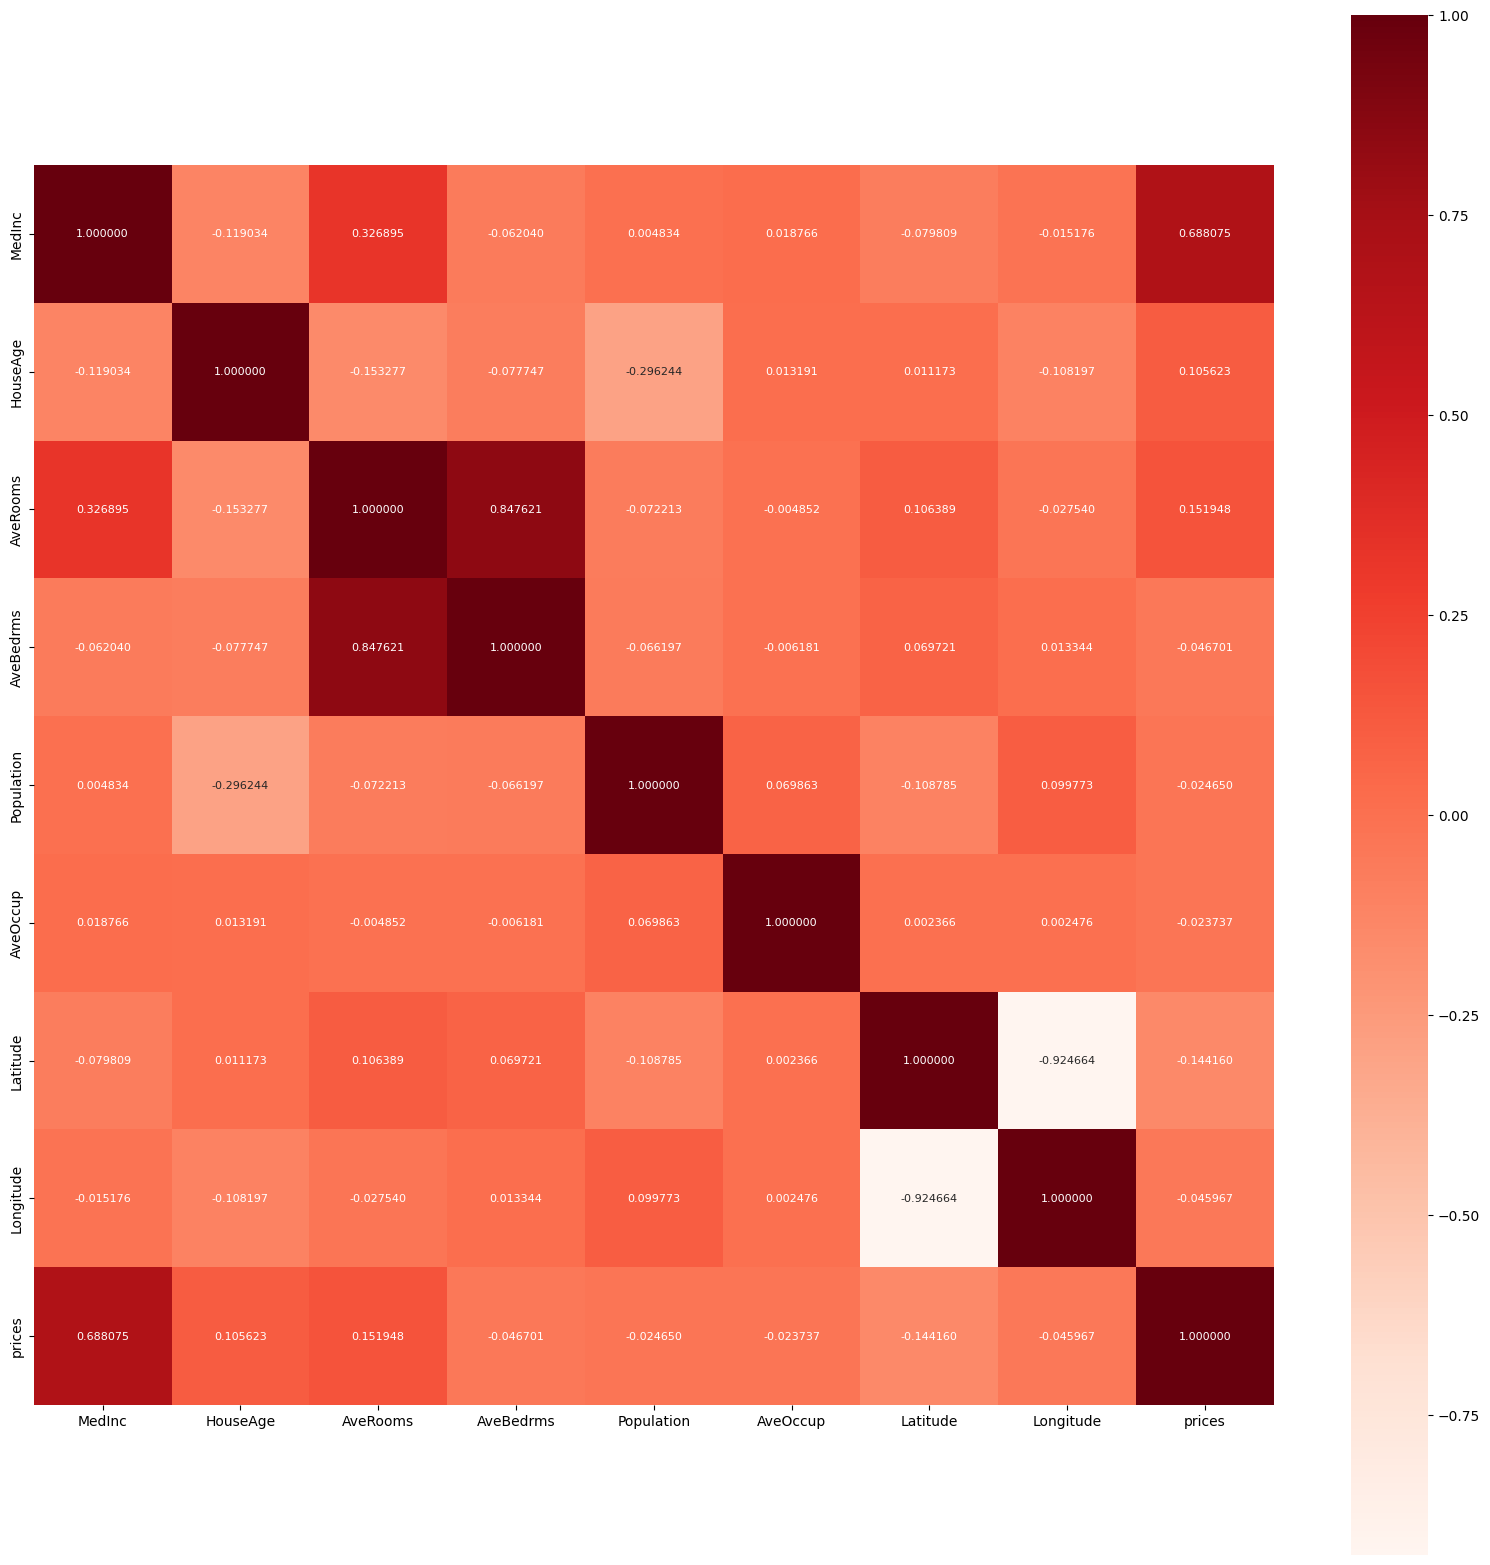

In [32]:
# plotting scatter plot 
plt.figure(figsize =(15,15))
# figsize -> it sets the size of the heatmap. we can set it higher to give the mapping a greater space to show, we cannot pass placeholder for it
sns.heatmap(correlation, cbar= True, square= True, fmt='1f' , annot= True, annot_kws= {'size':8}, cmap= 'Reds')
# correlation -> the variable that contains all the correlation
# cbar -> shows the color bar that shows value with the intensity of colo
# square -> it sets the shape
# fmt -> format for the annotations
# annot -> sets the annotations. The value we get in each cell
# annot_kws -> used to pass additional keyword arguments to the function used to draw the annotations on each cell of the heatmap. we can pass more arguments like font size, color, e.t.c
# cmap -> it specifies the color of the cells used in the heatmap


Starting Data Pre-processing

In [39]:
# splitting the dataframe into inputs/features and output/target
X = house_prices_dataframe.drop(labels='prices' , axis= 1)
# we can also use index in the place of labels 
# axis = 0 -> operates on row in 2-D array
# axis = 1 -> operates on column in 2-D array
# axis = 2 -> operates on 3-D array on height

Y = house_prices_dataframe['prices']
print(X.head())
print(Y.head())


   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: prices, dtype: float64


Splitting the Dataset in training and testing data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)
print(X_train.shape , X_test.shape, Y_train.shape, Y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


Loading the model

In [45]:
model = XGBRegressor()

Trainning the model

In [47]:
model.fit(X_train,Y_train)
train_prediction = model.predict(X_train)
print(train_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


Evalutaing the accuracy of the model

In [52]:
# train accuracy of the model using R_squared error and Mean Absolute Error
# these errors are generally used for REGRESSOR model
# R squared error
train_r2Score = metrics.r2_score(Y_train, train_prediction)
print(train_r2Score)

# Mean Absolute error
train_maeScore = metrics.mean_absolute_error(Y_train, train_prediction)
print(train_maeScore)

0.943650140819218
0.1933648700612105


Predicting for the TEST data and calculating error

In [55]:
# testing prediction
testing_prediction = model.predict(X_test)
print(testing_prediction)

# testing accuracy of the model 

# R squared error
test_r2Score = metrics.r2_score(Y_test, testing_prediction)
print(test_r2Score)

# Mean Absolute error
test_mae = metrics.mean_absolute_error(Y_test, testing_prediction)
print(test_mae)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]
0.8338000331788725
0.3108631800268186


Visualizing the Real Prices VS Predicted prices

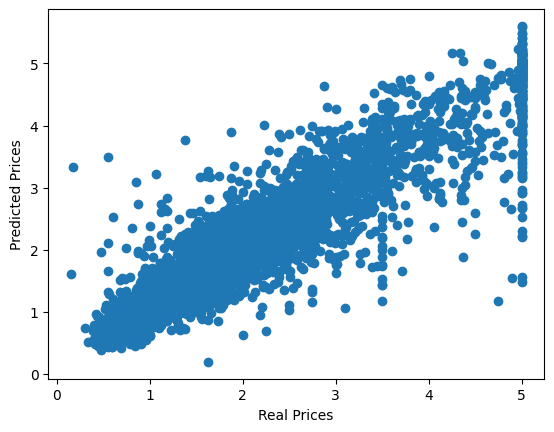

In [57]:
plt.scatter(Y_test, testing_prediction)
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.show()